<a href="https://colab.research.google.com/github/hector6298/Deep-Learning-Collab-notebooks/blob/master/segmentation_EfficientnetB0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modified U-net with EfficientNetB7 as the encoder

This collab is made to train a segmentation model with a custom dataset, not from tensorflow APIs.
The dataset to be used is COCO along with its API for image filenames, classes and segmentation masks loading.

Thi line is just to mount your Google Drive. You can skip it if you want.

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Remove useless data from Collab.

In [ ]:
!rm -r /content/sample_data

Download and set raw COCO data

In [ ]:
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip train2014.zip
!rm train2014.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014_000000122356.jpg  
 extracting: train2014/COCO

In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip
!unzip val2014.zip
!rm val2014.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: val2014/COCO_val2014_000000279145.jpg  
 extracting: val2014/COCO_val2014_000000243495.jpg  
 extracting: val2014/COCO_val2014_000000225791.jpg  
 extracting: val2014/COCO_val2014_000000428067.jpg  
 extracting: val2014/COCO_val2014_000000059383.jpg  
 extracting: val2014/COCO_val2014_000000558498.jpg  
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.jpg  
 extracting: val2014/COCO_val2014_0000

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations_trainval2014.zip
!rm annotations_trainval2014.zip

--2020-08-18 20:26:19--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.89.59
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.89.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  13.5MB/s    in 20s     

2020-08-18 20:26:40 (12.2 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: annotations/instances_train2014.json  
  inflating: annotations/instances_val2014.json  
  inflating: annotations/person_keypoints_train2014.json  
  inflating: annotations/person_keypoints_val2014.json  
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


Clone and install the API into the VM.

In [ ]:
!git clone https://github.com/nightrome/cocostuffapi.git
!make -C cocostuffapi/PythonAPI/

Cloning into 'cocostuffapi'...
remote: Enumerating objects: 1129, done.
remote: Total 1129 (delta 0), reused 0 (delta 0), pack-reused 1129
Receiving objects: 100% (1129/1129), 11.81 MiB | 6.08 MiB/s, done.
Resolving deltas: 100% (669/669), done.
make: Entering directory '/content/cocostuffapi/PythonAPI'
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocostuffapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdat

Install tensorflow examples to use Pix2Pix for the upsamplers in the decoding part.

In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git
!pip install --upgrade tensorflow-hub

Requirement already up-to-date: tensorflow-hub in /usr/local/lib/python3.6/dist-packages (0.8.0)


##Python Code

In [ ]:
%matplotlib inline
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize
from tensorflow_examples.models.pix2pix import pix2pix
from cocostuffapi.PythonAPI.pycocotools.coco import COCO
from cocostuffapi.PythonAPI.pycocotools.cocostuffhelper import cocoSegmentationToSegmentationMap
import tensorflow_hub as hub

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

Method to retrieve all the image Ids

In [ ]:
# get all images containing given categories, select one at random
def getIds4Categories(coco, categories):
  idlist = []
  classMap = dict()
  label = 1
  for category in categories:
    print(f"resolving for {category}...")
    catIds = coco.getCatIds(catNms=[category])
    classMap[catIds[0]] = label
    print(label)
    label += 1
    imgIds = coco.getImgIds(catIds=catIds )
    for id in imgIds:
      idlist.append(id)
  return idlist, classMap

Method to convert coco segmentation data into a mask for each image, given a dictionary mapping COCO classes ids to labels.

In [ ]:
def getMask(coco, imgId, classMap, iscrowd=False, checkUniqueClass=False):
  shape = coco.imgs[imgId]
  shape = (shape['height'], shape['width'])
  labelMap = np.zeros(shape)

  annIds = coco.getAnnIds(imgIds=imgId, iscrowd=iscrowd)
  imgAnns = coco.loadAnns(annIds)

  for ann in imgAnns:
    labelMask = coco.annToMask(ann) == 1
    if ann['category_id'] in classMap:
      newLabel = classMap[ann['category_id']]
      labelMap[labelMask] = newLabel
  return labelMap

This is the class that will generate all our data for training. It is subclassed from keras.utils.Sequence A useful class to easily  train a Keras model using custom data.

In [ ]:
class DataGenerator(keras.utils.Sequence):
  def __init__(self,
               coco,
               imgIds,
               datadir,
               classMap=None,
               is_training=True,
               batch_size=8,
               input_shape=(224,224),
               num_channels = 3,
               shuffle=True,
               augmentationParams=None,
               seed = 3
               ):
    self.coco = coco
    self.imgIds = imgIds
    self.batch_size = batch_size
    self.input_shape = input_shape
    self.num_channels = num_channels
    self.shuffle = shuffle
    self.datadir = datadir
    self.classMap = classMap
    self.imgObjs = self.coco.loadImgs(self.imgIds)
    self.is_training = is_training
    self.n = 0
    self.seed = seed
    if augmentationParams is not None:
      self.augmentationEngineIMG = ImageDataGenerator(**augmentationParams)
      self.augmentationEngineMASK = ImageDataGenerator(**augmentationParams)
      
  def __next__(self):
    batch_x, batch_y = self.__getitem__(self.n)
    self.n += 1
    if self.n >= self.__len__():
      self.on_epoch_end()
      self.n = 0
    return batch_x, batch_y
  
  def __len__(self):
    return int(np.floor(len(self.imgIds)/float(self.batch_size)))
  
  def reset_batch_index(self):
    self.n = 0

  def on_epoch_end(self):
    if self.shuffle == True:
      np.random.shuffle(self.imgObjs)

  def __getitem__(self, idx):
    sample = self.imgObjs[idx*self.batch_size:(idx+1)*self.batch_size]
    batch_x = np.empty((self.batch_size, self.input_shape[0], self.input_shape[1], self.num_channels), dtype=np.float32)
    batch_y = np.empty((self.batch_size, self.input_shape[0], self.input_shape[1], 1), dtype=np.float32)

    for i in range(self.batch_size):
      img = io.imread(f"{self.datadir}/{sample[i]['file_name']}")
      mask = getMask(self.coco, sample[i]['id'], self.classMap)
      mask = np.expand_dims(mask, axis=2)
      if(len(img.shape) < 3):
        img = np.expand_dims(img,axis=2)

      img = resize(img, self.input_shape)
      mask = resize(mask, self.input_shape)

      if self.is_training and hasattr(self,'augmentationEngineIMG'):
        img = self.augmentationEngineIMG.random_transform(img, seed=self.seed)
        mask = self.augmentationEngineMASK.random_transform(mask, seed=self.seed)
      
      batch_x[i] = img
      batch_y[i] = mask
 

    return batch_x, batch_y


#Main Code

##Data directories and hiperparameters.

In [ ]:
dataType='train2014'
dataDirTrain='/content/train2014'
dataDirTest='/content/val2014'
annFileTrain='/content/annotations/instances_train2014.json'
annFileTest='/content/annotations/instances_val2014.json'


INPUT_SHAPE = [224,224,3]
EPOCHS = 10
VAL_SUBSPLITS = 5
BATCH_SIZE = 100
LEARNING_RATE = 0.001


**Please define the classes you want to train the model with** I wanted to segment vehicles, so I used ['bus','car','truck']
See what classes. Run the cell below to know which classes you can use.

In [ ]:

cocoTrain=COCO(annFileTrain)
cocoTest=COCO(annFileTest)

cats = cocoTrain.loadCats(cocoTrain.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))


loading annotations into memory...
Done (t=11.89s)
creating index...
index created!
loading annotations into memory...
Done (t=6.42s)
creating index...
index created!
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush



**DEFINE YOUR CLASSES HERE**

In [ ]:
CLASSES2SEGMENT= ["person"]
OUTPUT_CHANNELS = len(CLASSES2SEGMENT) + 1 

Load ids for the iamges on given categories and defining a dictionary that maps category ids to labels.
Instantiating DataGenerators; the one for the training will make use of data augmentation using the parameters given in this cell. Please change it to suit your needs.

In [ ]:
idlistTrain, classMap = getIds4Categories(cocoTrain, CLASSES2SEGMENT)
idlistTest, classMap = getIds4Categories(cocoTest, CLASSES2SEGMENT)

#dictionary for image data augmentation
data_gen_args = dict(featurewise_center=False,
                     featurewise_std_normalization=False,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     horizontal_flip=True)

trainImgGenerator = DataGenerator(cocoTrain, idlistTrain, dataDirTrain, classMap=classMap, batch_size=BATCH_SIZE, augmentationParams=data_gen_args)
testImgGenerator = DataGenerator(cocoTest, idlistTest, dataDirTest, classMap=classMap, batch_size=BATCH_SIZE, is_training=False)

resolving for person...
1
resolving for person...
1


Let's test the generator to show an image and its corresponding mask showing only desired classes.

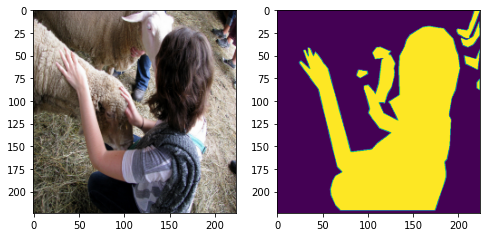

In [ ]:
total_batch = len(testImgGenerator)
batch_x, batch_y = next(testImgGenerator)
testImgGenerator.reset_batch_index()

img, mask = batch_x[0], batch_y[0]
fig, axis = plt.subplots(1,2)
axis[0].imshow(img)
axis[1].imshow(tf.keras.preprocessing.image.array_to_img(mask))
plt.show()



##Let's define the model

Install eficcientnet for tensorflow keras

In [ ]:
!pip3 install efficientnet
import efficientnet.tfkeras


     |████████████████████████████████| 51kB 2.6MB/s 


In [ ]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)

layernames = ["conv1_conv",               #128 channels
              "conv2_block3_preact_relu", #256 channels
              "conv3_block4_preact_relu", #512 channels
              "conv4_block6_preact_relu", #1024 channels
              "post_relu"] #2048 channels   
layers = [base_model.get_layer(name).output for name in layernames]
downsample_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)
downsample_stack.trainable = False

upsample_stack = [pix2pix.upsample(1024,3),
                  pix2pix.upsample(512,3),
                  pix2pix.upsample(256,3),
                  pix2pix.upsample(128,3),
                  pix2pix.upsample(64,3)]


94674944/94668760 [==============================] - 3s 0us/step


In [ ]:
#base_model = tf.keras.applications.resnet_v2.ResNet50V2(weights='imagenet', input_shape=INPUT_SHAPE, include_top=False)

base_model = efficientnet.tfkeras.EfficientNetB0(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

layernames = ["block1a_project_bn", #(112,112,16)
              "block2b_drop", #(56,56,24)
              "block3b_drop", #(28,28,40)
              "block4c_drop", #(14,14,80) 
              "block6d_drop", #(7,7,192)
              ]   

layers = [base_model.get_layer(name).output for name in layernames]
downsample_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)
downsample_stack.trainable = False

upsample_stack = [pix2pix.upsample(96,3),
                  pix2pix.upsample(40,3),
                  pix2pix.upsample(20,3),
                  pix2pix.upsample(12,3),
                  pix2pix.upsample(8,3),
                  ]


16809984/16804768 [==============================] - 2s 0us/step


In [ ]:
def mod_unet_efficientnet(output_channels, input_shape=[224,224,3]):
  inputs = tf.keras.layers.Input(shape=input_shape)
  x = inputs
  #encoder
  skips = downsample_stack(x)
  #get last of the outputs for bottleneck
  x = skips[-1]
  skips = reversed(skips[:-1])

  #decoder
  it = 0
  for layer_enc, skip in zip(upsample_stack, skips):
    print(it)
    x = layer_enc(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x,skip])
    
    it += 1

  #last layer

  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, padding='same', name='outMask'
  )

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)


Define Our IOU metric before compiling. Default MeanIoU class does not support results from multiple channels that serves as logits

In [ ]:
class meanIoU(tf.keras.metrics.MeanIoU):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=-1)
        y_pred = y_pred[..., tf.newaxis]
        return super().update_state(y_true, y_pred, sample_weight=sample_weight)


Instantiate our model and plot the graph.

0
1
2
3


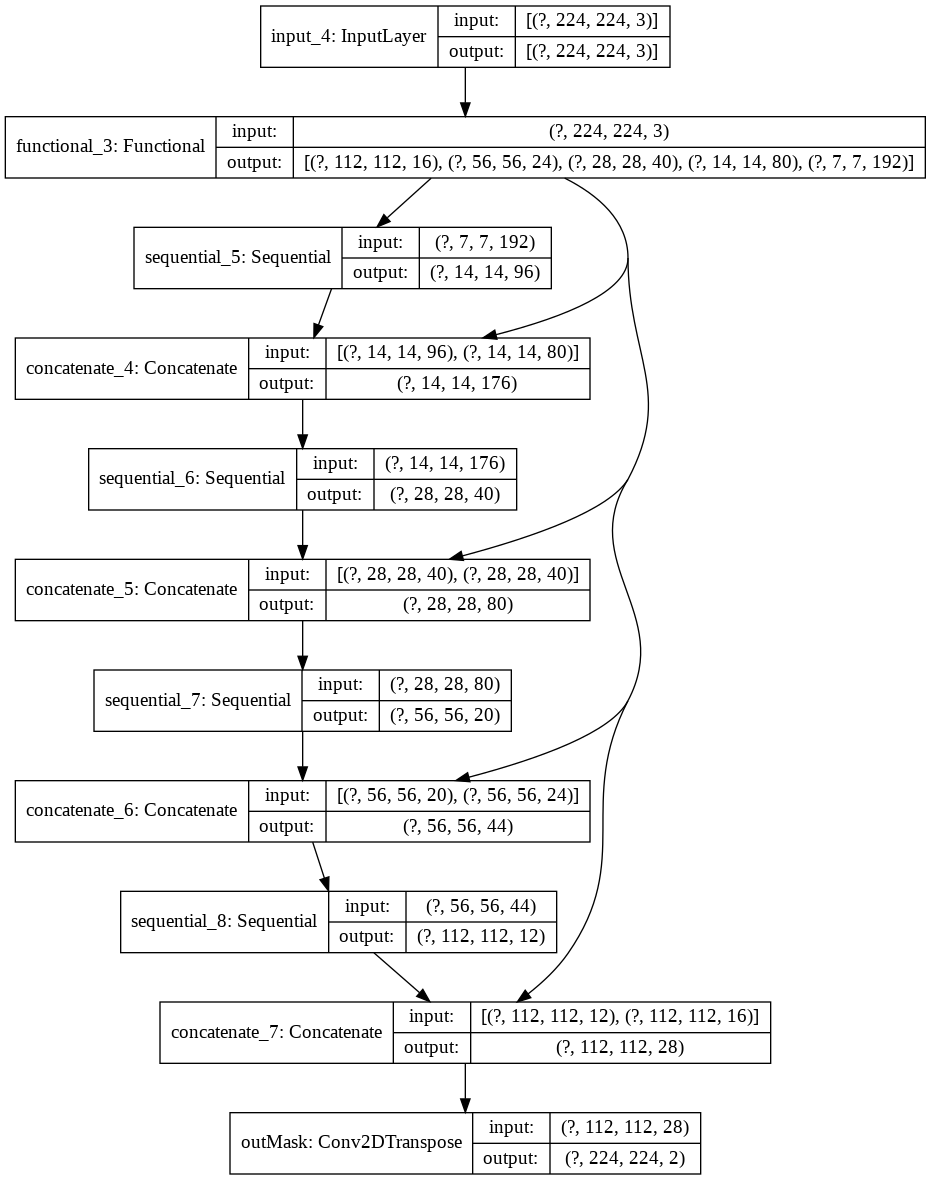

In [ ]:
model = mod_unet_efficientnet(OUTPUT_CHANNELS)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=[meanIoU(4)])
tf.keras.utils.plot_model(model, show_shapes=True)


##get mask inference methods

In [ ]:
def create_mask_from_inference(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


In [ ]:
def show_predictions(generator=None):
  if generator is not None:
    batch_x, batch_y = next(generator)
    generator.reset_batch_index()
    pred_mask = model.predict(batch_x)
    for i in range(5):
      display([batch_x[i], batch_y[i], create_mask_from_inference(pred_mask[i][tf.newaxis, ...])])
  else:
    display([sample_image, sample_mask,
             create_mask_from_inference(model.predict(sample_image[tf.newaxis, ...]))])


##Show the network is working before training

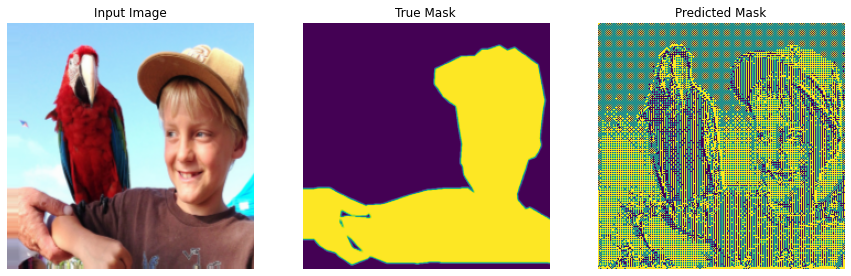

In [ ]:
trainImgGenerator.on_epoch_end()
batch_x, batch_y = next(trainImgGenerator)

sample_image, sample_mask = batch_x[0], batch_y[0]
show_predictions()

##Training

Do we have prior weights? You can skip this cell if you want.

In [ ]:
if os.path.exists('segmentation_net_weights.h5'):
  model.load_weights('segmentation_net_weights.h5')


In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mean_io_u_1',
    mode='max',
    save_best_only=True)

Train the model 

In [ ]:
model_history = model.fit(x=trainImgGenerator, 
                epochs=EPOCHS,
                validation_data=testImgGenerator,
                verbose=1,
                callbacks=[model_checkpoint_callback])

Epoch 1/10
451/451 [==============================] - 5561s 12s/step - loss: 0.2440 - mean_io_u_1: 0.6277 - val_loss: 0.1716 - val_mean_io_u_1: 0.7382
Epoch 2/10
451/451 [==============================] - 5695s 13s/step - loss: 0.1777 - mean_io_u_1: 0.7174 - val_loss: 0.1626 - val_mean_io_u_1: 0.7494
Epoch 3/10
355/451 [======================>.......] - ETA: 14:50 - loss: 0.1709 - mean_io_u_1: 0.7259

Display training metrics

In [ ]:
def plot_metrics(model_history):

  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  iou = model_history.history['mean_io_u']
  val_iou = model_history.history['val_mean_io_u']
  epochs = range(EPOCHS)
  fig, axs = plt.subplots(2)

  axs[0].plot(epochs, loss, 'r', label='Training loss')
  axs[0].plot(epochs, val_loss, 'bo', label='Validation loss')
  axs[0].title('Training and Validation Loss')
  axs[0].xlabel('Epoch')
  axs[0].ylabel('Loss Value')
  axs[1].plot(epochs, iou, 'r', label='Training iou')
  axs[1].plot(epochs, val_iou, 'bo', label='Validation iou')
  axs[1].title('Training and Validation iou')
  axs[1].xlabel('Epoch')
  axs[1].ylabel('iou Value')
  plt.legend()
  plt.show()



In [ ]:
plot_metrics(model_history)

##Save Model

Save weights after training and network architechture

In [ ]:
json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)
model.save_weights('segmentation_net_weights.h5')
files.download('segmentation_net_weights.h5')
files.downlaod('model_config.json')